In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [ ]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:50]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3],
       [4],
       [7],
       [7],
       [2],
       [9],
       [9],
       [9],
       [3],
       [2],
       [6],
       [4],
       [3],
       [6],
       [6],
       [2],
       [6],
       [3],
       [5],
       [4],
       [0],
       [0],
       [9],
       [1],
       [3],
       [4],
       [0],
       [3],
       [7],
       [3],
       [3],
       [5],
       [2],
       [2],
       [7],
       [1],
       [1],
       [1],
       [2],
       [2],
       [0]], dtype=uint8)

In [ ]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
def plot_sample(x,y,index):
  plt.figure(figsize=(15,0.5))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

In [ ]:
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)

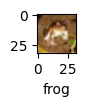

In [ ]:
plot_sample(x_train,y_train,0)

In [ ]:
x_train=x_train/255.0
x_test=x_test/255.0

In [ ]:
ANN=models.Sequential([layers.Flatten(input_shape=(32,32,3)),
                       layers.Dense(3000,activation='relu'),
                       layers.Dense(1000,activation='relu'),
                       layers.Dense(10,activation='softmax')])

In [ ]:
ANN.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
ANN.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 159s 101ms/step - loss: 1.8138 - accuracy: 0.3509
Epoch 2/5
1563/1563 [==============================] - 155s 99ms/step - loss: 1.6250 - accuracy: 0.4268
Epoch 3/5
1563/1563 [==============================] - 159s 102ms/step - loss: 1.5420 - accuracy: 0.4572
Epoch 4/5
1563/1563 [==============================] - 157s 101ms/step - loss: 1.4801 - accuracy: 0.4808
Epoch 5/5
1563/1563 [==============================] - 156s 100ms/step - loss: 1.4351 - accuracy: 0.4943


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
y_predict=ANN.predict(x_test)
y_predict_classes=[np.argmax(element)for element in y_predict]
print("classification report:",classification_report(y_test,y_predict_classes))

313/313 [==============================] - 10s 31ms/step
classification report:               precision    recall  f1-score   support

           0       0.51      0.62      0.56      1000
           1       0.44      0.80      0.57      1000
           2       0.37      0.39      0.38      1000
           3       0.37      0.28      0.32      1000
           4       0.56      0.20      0.30      1000
           5       0.38      0.44      0.40      1000
           6       0.58      0.43      0.50      1000
           7       0.47      0.65      0.55      1000
           8       0.72      0.48      0.58      1000
           9       0.56      0.45      0.50      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.47     10000
weighted avg       0.50      0.48      0.47     10000

